In [5]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC, SMOTE
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

# from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings

warnings.filterwarnings("ignore")

### Import Required Data from NHANES - National Health And Nutrition Examination Survey sites


In [7]:
# Demographic Data
df_demo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.XPT')

In [8]:
df_demo

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,66.0,2.0,1.0,2.0,NaN,5.0,6.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3.0,156.0,4.66
1,109264.0,66.0,2.0,2.0,13.0,NaN,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,11689.747264,1.227116e+04,1.0,155.0,0.83
2,109265.0,66.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,16273.825939,1.665876e+04,1.0,157.0,3.06
3,109266.0,66.0,2.0,2.0,29.0,NaN,5.0,6.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2.0,168.0,5.00
4,109267.0,66.0,1.0,2.0,21.0,NaN,2.0,2.0,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,26379.991724,5.397605e-79,1.0,156.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,66.0,2.0,1.0,40.0,NaN,4.0,4.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,21586.596728,2.166689e+04,1.0,166.0,3.82
15556,124819.0,66.0,2.0,1.0,2.0,NaN,4.0,4.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,1664.919253,1.838170e+03,2.0,171.0,0.07
15557,124820.0,66.0,2.0,2.0,7.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,14819.783161,1.649781e+04,1.0,157.0,1.22
15558,124821.0,66.0,2.0,1.0,63.0,NaN,4.0,4.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,4666.817952,4.853430e+03,1.0,158.0,3.71


In [9]:
# drop unrelevant features from the Demographic datset
df_demo1 = df_demo.drop(['SDDSRVYR', 'RIDSTATR',
       'RIDRETH1', 'RIDRETH3', 'DMDYRUSZ', 
        'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG',
       'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA',
       'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR'], axis = 1)

In [10]:
# Import Dietrary Data
df_diet = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DR1IFF.XPT')

In [11]:
df_diet

,SEQN,WTDRD1PP,WTDR2DPP,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,109263.0,7619.483586,1.780807e+04,12.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,1.941000e+00,3.600000e-02,5.397605e-79,8.380000e-01,8.800000e-02,5.397605e-79,1.200000e-02,5.397605e-79,5.397605e-79,5.397605e-79
1,109263.0,7619.483586,1.780807e+04,10.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,1.229000e+00,1.300000e-02,5.397605e-79,5.200000e-01,1.300000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,109263.0,7619.483586,1.780807e+04,4.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,5.683000e+00,8.800000e-02,5.000000e-03,3.482000e+00,4.210000e-01,5.000000e-03,2.900000e-02,1.000000e-02,1.000000e-02,5.397605e-79
3,109263.0,7619.483586,1.780807e+04,9.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,1.000000e-02,5.397605e-79,5.397605e-79,6.900000e-02,1.500000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,109263.0,7619.483586,1.780807e+04,13.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,2.382000e+00,1.400000e-02,5.397605e-79,1.209000e+00,1.140000e-01,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183905,124821.0,3043.724330,5.397605e-79,5.0,1.0,81.0,2.0,1.0,5.397605e-79,7.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
183906,124821.0,3043.724330,5.397605e-79,4.0,1.0,81.0,2.0,1.0,5.397605e-79,7.0,...,1.600000e+00,5.397605e-79,2.000000e-03,2.632000e+00,2.010000e-01,5.397605e-79,1.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79
183907,124821.0,3043.724330,5.397605e-79,3.0,1.0,81.0,2.0,1.0,5.397605e-79,7.0,...,3.900000e-01,4.000000e-03,5.397605e-79,6.530000e-01,7.900000e-02,5.397605e-79,9.000000e-03,1.500000e-02,1.000000e-03,1.600000e-02
183908,124821.0,3043.724330,5.397605e-79,2.0,1.0,81.0,2.0,1.0,5.397605e-79,7.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [12]:
# drop unrelated columns
df_diet1  = df_diet.drop([ 'DR1ILINE', 'DR1DRSTZ', 'DR1EXMER',
       'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1CCMNM',
       'DR1CCMTX', 'DR1_020', 'DR1_030Z', 'DR1FS', 'DR1_040Z', 'DR1IFDCD',
       'DR1IGRMS', 'DR1IMFAT', 'DR1IPFAT', 'DR1IATOC',
        'DR1IRET',  'DR1IACAR', 'DR1IBCAR', 'DR1ICRYP',
       'DR1ILYCO', 'DR1ILZ',  'DR1INIAC', 
       'DR1IFOLA', 'DR1IFA', 'DR1IFF', 'DR1IFDFE', 'DR1ICHL',  'DR1IPHOS',
       'DR1IMAGN', 'DR1IPOTA',
       'DR1ISELE',  'DR1ITHEO',  'DR1IMOIS', 'DR1IS040',
       'DR1IS060', 'DR1IS080', 'DR1IS100', 'DR1IS120', 'DR1IS140', 'DR1IS160',
       'DR1IS180', 'DR1IM161', 'DR1IM181', 'DR1IM201', 'DR1IM221', 'DR1IP182',
       'DR1IP183', 'DR1IP184', 'DR1IP204', 'DR1IP205', 'DR1IP225', 'DR1IP226', 'DR1ICOPP', 'WTDRD1PP','WTDR2DPP' ], axis = 1)

In [13]:
# IMport examination Data - Body Measure
df_bmx = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.XPT')

In [14]:
df_bmx1 = df_bmx.drop([ 'BMDSTATS',  'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD',
       'BMIHEAD', 'BMXHT', 'BMIHT',   'BMXLEG', 'BMILEG',
       'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST',
       'BMXHIP', 'BMIHIP'], axis = 1)

In [15]:
# Import Labratory Data - Insulin
df_insulin = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_INS.XPT')

In [16]:
# Import Labratory Data - Cholestrol data
df_chol = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_TCHOL.XPT')

In [17]:
# Import Labratory Data - Glucose
df_glu = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_GLU.XPT')

In [18]:
#  Merge all the data based on Sequence Number
df_demo_diet_bmx_ins_chol_glu = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_demo1, df_bmx1, on='SEQN', how='inner'), 
                                              df_insulin, on='SEQN', how='inner'), 
                                             df_chol, on='SEQN', how='inner'),
                                            df_glu, on='SEQN', how='inner'),
                                         df_diet1, on='SEQN', how='inner') 

In [19]:
df_demo_diet_bmx_ins_chol_glu.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDEXMON,DMDBORN4,DMDEDUC2,DMDMARTZ,BMXWT,BMXBMI,...,DR1IB12A,DR1IVC,DR1IVD,DR1IVK,DR1ICALC,DR1IIRON,DR1IZINC,DR1ISODI,DR1ICAFF,DR1IALCO
0,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.0,5.397605e-79,0.01,2.0,5.397605e-79,5.397605e-79
1,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,7.0,5.397605e-79,0.02,10.0,5.397605e-79,5.397605e-79
2,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,16.0,5.397605e-79,0.05,21.0,5.397605e-79,5.397605e-79
3,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,9.000000e-01,5.397605e-79,3.700000e+00,11.0,6.300000e-01,0.73,210.0,5.397605e-79,5.397605e-79
4,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,1.000000e-01,5.397605e-79,8.000000e-01,1.0,4.000000e-02,0.01,23.0,5.397605e-79,5.397605e-79


In [20]:
# null value check 
df_demo_diet_bmx_ins_chol_glu.isna().sum()

SEQN              0
RIAGENDR          0
RIDAGEYR          0
RIDAGEMN      68857
RIDEXMON          0
DMDBORN4          0
DMDEDUC2       9150
DMDMARTZ       9150
BMXWT           721
BMXBMI          903
BMDBMIC       59873
WTSAFPRP_x        0
LBXIN          5406
LBDINSI        5406
LBDINLC        5406
LBXTC          4908
LBDTCSI        4908
WTSAFPRP_y        0
LBXGLU         3821
LBDGLUSI       3821
DR1IKCAL          0
DR1IPROT          0
DR1ICARB          0
DR1ISUGR          0
DR1IFIBE          0
DR1ITFAT          0
DR1ISFAT          0
DR1ICHOL          0
DR1IATOA          0
DR1IVARA          0
DR1IVB1           0
DR1IVB2           0
DR1IVB6           0
DR1IVB12          0
DR1IB12A          0
DR1IVC            0
DR1IVD            0
DR1IVK            0
DR1ICALC          0
DR1IIRON          0
DR1IZINC          0
DR1ISODI          0
DR1ICAFF          0
DR1IALCO          0
dtype: int64

In [21]:
df_demo_diet_bmx_ins_chol_glu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68857 entries, 0 to 68856
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQN        68857 non-null  float64
 1   RIAGENDR    68857 non-null  float64
 2   RIDAGEYR    68857 non-null  float64
 3   RIDAGEMN    0 non-null      float64
 4   RIDEXMON    68857 non-null  float64
 5   DMDBORN4    68857 non-null  float64
 6   DMDEDUC2    59707 non-null  float64
 7   DMDMARTZ    59707 non-null  float64
 8   BMXWT       68136 non-null  float64
 9   BMXBMI      67954 non-null  float64
 10  BMDBMIC     8984 non-null   float64
 11  WTSAFPRP_x  68857 non-null  float64
 12  LBXIN       63451 non-null  float64
 13  LBDINSI     63451 non-null  float64
 14  LBDINLC     63451 non-null  float64
 15  LBXTC       63949 non-null  float64
 16  LBDTCSI     63949 non-null  float64
 17  WTSAFPRP_y  68857 non-null  float64
 18  LBXGLU      65036 non-null  float64
 19  LBDGLUSI    65036 non-nul

In [22]:
# Final dataset for execution
df_final = df_demo_diet_bmx_ins_chol_glu.drop(['RIDAGEMN', 'BMDBMIC', 'RIDEXMON', 'DR1IZINC', 'DR1ISODI', 
                          'LBDINSI','LBDINLC','LBDTCSI', 'LBXTC','LBXGLU', 'WTSAFPRP_y', 'WTSAFPRP_x', 
                          'SEQN',  'DR1ISFAT'], axis = 1)

In [23]:
df_final.shape

(68857, 30)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68857 entries, 0 to 68856
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  68857 non-null  float64
 1   RIDAGEYR  68857 non-null  float64
 2   DMDBORN4  68857 non-null  float64
 3   DMDEDUC2  59707 non-null  float64
 4   DMDMARTZ  59707 non-null  float64
 5   BMXWT     68136 non-null  float64
 6   BMXBMI    67954 non-null  float64
 7   LBXIN     63451 non-null  float64
 8   LBDGLUSI  65036 non-null  float64
 9   DR1IKCAL  68857 non-null  float64
 10  DR1IPROT  68857 non-null  float64
 11  DR1ICARB  68857 non-null  float64
 12  DR1ISUGR  68857 non-null  float64
 13  DR1IFIBE  68857 non-null  float64
 14  DR1ITFAT  68857 non-null  float64
 15  DR1ICHOL  68857 non-null  float64
 16  DR1IATOA  68857 non-null  float64
 17  DR1IVARA  68857 non-null  float64
 18  DR1IVB1   68857 non-null  float64
 19  DR1IVB2   68857 non-null  float64
 20  DR1IVB6   68857 non-null  fl

In [25]:
# create Glucose column for the round value of glucose status from lab data
df_final['GLUCOSE'] = df_final['LBDGLUSI'].round()
counts = df_final['GLUCOSE'] .value_counts()
counts

6.0     28449
5.0     22924
7.0      6053
8.0      1946
9.0      1332
10.0     1046
4.0       825
11.0      518
12.0      453
13.0      316
14.0      231
16.0      198
17.0      162
15.0      133
18.0      112
20.0       83
19.0       75
22.0       57
3.0        56
21.0       27
23.0       21
25.0       11
29.0        8
Name: GLUCOSE, dtype: int64

<Axes: >

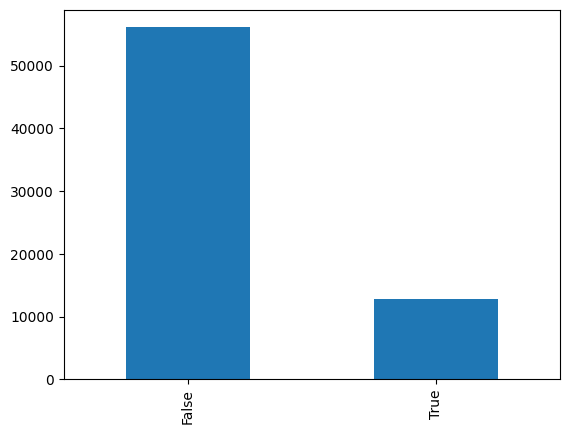

In [26]:
# check Diabetes count, according to research- more than/equal to 7 considered as diabetic 
(df_final['GLUCOSE']>=7).value_counts().plot(kind='bar')
# below plot shows the imbalance in data set

In [27]:
df_final = df_final.drop(['GLUCOSE'], axis = 1 )

In [28]:
# Drop unrelated VItamins data which may not be useful in diabetic prediction
df_final = df_final.drop(['DR1IATOA', 'DR1IVARA', 'DR1IVB1', 'DR1IVB2', 'DR1IVB6', 'DR1IVB12', 'DR1IB12A', 'DR1IVC', 
                         'DR1IVD','DR1IVK'], axis = 1)

In [29]:
df_final = df_final.drop(['BMXWT', 'DR1IKCAL', 'DMDEDUC2'], axis = 1)


In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68857 entries, 0 to 68856
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  68857 non-null  float64
 1   RIDAGEYR  68857 non-null  float64
 2   DMDBORN4  68857 non-null  float64
 3   DMDMARTZ  59707 non-null  float64
 4   BMXBMI    67954 non-null  float64
 5   LBXIN     63451 non-null  float64
 6   LBDGLUSI  65036 non-null  float64
 7   DR1IPROT  68857 non-null  float64
 8   DR1ICARB  68857 non-null  float64
 9   DR1ISUGR  68857 non-null  float64
 10  DR1IFIBE  68857 non-null  float64
 11  DR1ITFAT  68857 non-null  float64
 12  DR1ICHOL  68857 non-null  float64
 13  DR1ICALC  68857 non-null  float64
 14  DR1IIRON  68857 non-null  float64
 15  DR1ICAFF  68857 non-null  float64
 16  DR1IALCO  68857 non-null  float64
dtypes: float64(17)
memory usage: 9.5 MB


In [31]:
df_final.isna().sum()

RIAGENDR       0
RIDAGEYR       0
DMDBORN4       0
DMDMARTZ    9150
BMXBMI       903
LBXIN       5406
LBDGLUSI    3821
DR1IPROT       0
DR1ICARB       0
DR1ISUGR       0
DR1IFIBE       0
DR1ITFAT       0
DR1ICHOL       0
DR1ICALC       0
DR1IIRON       0
DR1ICAFF       0
DR1IALCO       0
dtype: int64

In [32]:
df_final = df_final.dropna(subset=['DMDMARTZ', 'BMXBMI','LBXIN', 'LBDGLUSI'])

In [33]:
df_final.isna().sum()

RIAGENDR    0
RIDAGEYR    0
DMDBORN4    0
DMDMARTZ    0
BMXBMI      0
LBXIN       0
LBDGLUSI    0
DR1IPROT    0
DR1ICARB    0
DR1ISUGR    0
DR1IFIBE    0
DR1ITFAT    0
DR1ICHOL    0
DR1ICALC    0
DR1IIRON    0
DR1ICAFF    0
DR1IALCO    0
dtype: int64

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54924 entries, 19 to 68856
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  54924 non-null  float64
 1   RIDAGEYR  54924 non-null  float64
 2   DMDBORN4  54924 non-null  float64
 3   DMDMARTZ  54924 non-null  float64
 4   BMXBMI    54924 non-null  float64
 5   LBXIN     54924 non-null  float64
 6   LBDGLUSI  54924 non-null  float64
 7   DR1IPROT  54924 non-null  float64
 8   DR1ICARB  54924 non-null  float64
 9   DR1ISUGR  54924 non-null  float64
 10  DR1IFIBE  54924 non-null  float64
 11  DR1ITFAT  54924 non-null  float64
 12  DR1ICHOL  54924 non-null  float64
 13  DR1ICALC  54924 non-null  float64
 14  DR1IIRON  54924 non-null  float64
 15  DR1ICAFF  54924 non-null  float64
 16  DR1IALCO  54924 non-null  float64
dtypes: float64(17)
memory usage: 7.5 MB


In [35]:
# there are few categorical features too , will be using SMOTE_NC
X = df_final.drop('LBDGLUSI', axis = 1)
y = df_final['LBDGLUSI']
# to remove "ValueError: Unknown label type: 'continuous'" error, hanging the data type for target variable
y = y.astype('int')

In [36]:
X.head()
X.shape

(54924, 16)

In [37]:
# categorical_features
categorical_features = [0, 2, 3, 4] 
# Using SMOTE-NC for unbalance data - since data has categorical and numerical data, using SMOTE-NC instead of SMOTE
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [39]:
# Create a logistic regression model and fit it 
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on a test set (assuming X_test is the test set)
# y_pred = lr.predict(X_test)

LogisticRegression(random_state=42)

In [40]:
print(lr.score(X_test, y_test)) 

0.23803971959139325


In [41]:
# lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
#               'penalty': ['l1', 'l2', 'elasticnet'], 
#               'solver': ['liblinear', 'saga']}

# # Create grid search object
# grid_search = GridSearchCV(estimator=lr, param_grid=lr_params, cv=5, n_jobs=-1)



In [42]:
# # Fit the grid search object to the data
# grid_search.fit(X_train, y_train)



In [43]:
# # Print the best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)

# # Evaluate the best model
# y_pred = grid_search.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: ", accuracy)

# # lr_sc = lr_grid.best_score_
# # lr_tsc = lr_grid.score(X_test, y_test)

# # print(lr_sc)
# # print(lr_tsc)

In [44]:
%%time
# random Forest

# Create random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9740775836835134
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00      8683
           3       1.00      1.00      1.00      8732
           4       0.90      0.94      0.92      8690
           5       0.87      0.81      0.84      8741
           6       0.87      0.81      0.84      8742
           7       0.93      0.94      0.93      8855
           8       0.95      0.96      0.96      8824
           9       0.96      0.97      0.97      8794
          10       0.98      0.99      0.98      8738
          11       0.98      0.99      0.99      8676
          12       0.99      1.00      0.99      8662
          13       0.99      1.00      1.00      8790
          14       0.99      1.00      0.99      8647
          15       1.00      1.00      1.00      8815
          16       0.99      1.00      1.00      8819
          17       0.99      1.00      1.00      8762
          18       1.00     

In [45]:
%%time
# KNN 
# Creating a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the classifier to the training data
knn.fit(X_train, y_train)

# Making predictions on the test data
y_pred = knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9348441926345609
CPU times: user 14min 9s, sys: 230 ms, total: 14min 9s
Wall time: 3min 51s


In [46]:
# pip install catboost

In [47]:
# pip install xgboost

In [ ]:
%%time


# # create a CatBoostClassifier object
catboost = CatBoostClassifier()

# # fit the model to the training data
catboost.fit(X_train, y_train, verbose=False)

# # make predictions on the test data
y_pred = catboost.predict(X_test)

# # evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
# %%time
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

### XGBoost shows some error so comemnting it for now

In [ ]:
%%time
# # create an XGBClassifier object
# xgboost = XGBClassifier()

# # train the model
# xgboost.fit(X_train, y_train)

# # make predictions
# y_pred = xgboost.predict(X_test)

# # evaluate the model
# accuracy = accuracy_score(y_test, y_pred)

# print(accuracy)